## Asignación

### Psycopg2

In [1]:
import psycopg2
from psycopg2 import Error
from IPython.display import Image

In [2]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

print("Conection created successfully")

cursor.execute('''DROP TABLE IF EXISTS employees''')
create_table_query = '''CREATE TABLE employees
                            ( employee_id INTEGER
                            , first_name VARCHAR(20)
                            , last_name VARCHAR(25)
                            , email VARCHAR(25)
                            , phone_number VARCHAR(20)
                            , hire_date DATE
                            , job_id VARCHAR(10)
                            , salary NUMERIC(8,2)
                            , commission_pct NUMERIC(2,2)
                            , manager_id INTEGER
                            , department_id INTEGER
                            ) ;
                            '''
cursor.execute(create_table_query)
connection.commit()
print("Tabla 'employees' creada satisfactoriamente.")

# Crear índice único en employee_id
create_index_query = '''CREATE UNIQUE INDEX emp_emp_id_pk
                            ON employees (employee_id) ;
                            '''
cursor.execute(create_index_query)
connection.commit()
print("Índice único creado en 'employee_id'.")

# Agregar restricción de clave primaria
add_primary_key_query = '''ALTER TABLE employees ADD
                               PRIMARY KEY (employee_id);
                               '''
cursor.execute(add_primary_key_query)
connection.commit()
print("Restricción de clave primaria agregada en 'employee_id'.")

#Seleccionar toda la información de los primeros 10 empleados
cursor.execute("SELECT * FROM employees LIMIT 10;")
print("Las primeras 10 filas de la tabla 'employees':")
rows = cursor.fetchall()
for row in rows:
    print(row)

# Contar el número total de filas en la tabla
cursor.execute("SELECT count(1) FROM employees;")
count = cursor.fetchone()[0]
print("Número total de filas en la tabla 'employees':", count)

connection.commit()
connection.close()

Conection created successfully
Tabla 'employees' creada satisfactoriamente.
Índice único creado en 'employee_id'.
Restricción de clave primaria agregada en 'employee_id'.
Las primeras 10 filas de la tabla 'employees':
Número total de filas en la tabla 'employees': 0


El código anterior crea la tabla employees y sus respectivas columnas, se crea un índice identificador único para cada empleado (llave primaria).

Conexión con la base de datos


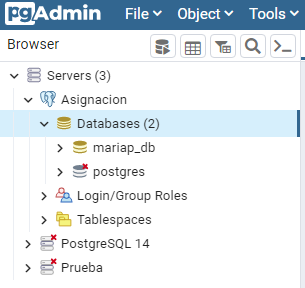

In [3]:
ruta_imagen = "C:\MariaP\Visualizacion Cientifica\PostgreSQL\Asignacion1.png"
print("Conexión con la base de datos")
Image(filename=ruta_imagen)

Tabla employees


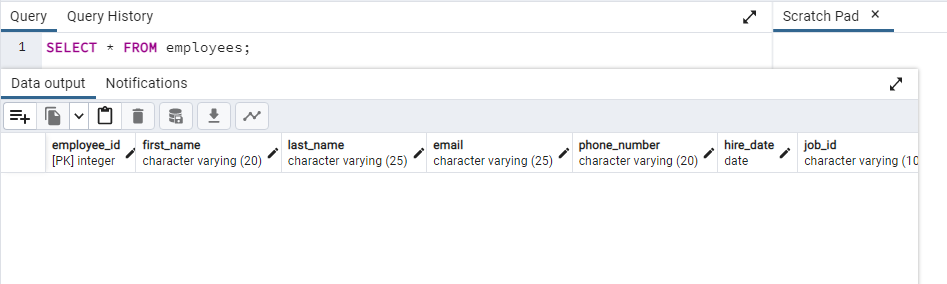

In [4]:
ruta_imagen = "C:\MariaP\Visualizacion Cientifica\PostgreSQL\Asignacion4.png"
print("Tabla employees")
Image(filename=ruta_imagen)

In [5]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

print("Conection created successfully")

cursor.execute('''DROP TABLE IF EXISTS courses''')
# Crear la tabla courses
create_table_query = '''CREATE TABLE courses (
                            course_id SERIAL PRIMARY KEY,
                            course_name VARCHAR(60),
                            course_author VARCHAR(40),
                            course_status VARCHAR(10) CHECK (course_status IN ('published', 'draft', 'inactive')),
                            course_published_dt DATE
                            );'''
cursor.execute(create_table_query)
connection.commit()
print("Tabla 'courses' creada satisfactoriamente.")


data = [
    ("Programming using Python", "Bob Dillon", "published", "2020-09-30"),
    ("Data Engineering using Python", "Bob Dillon", "published", "2020-07-15"),
    ("Data Engineering using Scala", "Elvis Presley", "draft", None),
    ("Programming using Scala", "Elvis Presley", "published", "2020-05-12"),
    ("Programming using Java", "Mike Jack", "inactive", "2020-08-10"),
    ("Web Applications - Python Flask", "Bob Dillon", "inactive", "2020-07-20"),
    ("Web Applications - Java Spring", "Mike Jack", "draft", None),
    ("Pipeline Orchestration - Python", "Bob Dillon", "draft", None),
    ("Streaming Pipelines - Python", "Bob Dillon", "published", "2020-10-05"),
    ("Web Applications - Scala Play", "Elvis Presley", "inactive", "2020-09-30"),
    ("Web Applications - Python Django", "Bob Dillon", "published", "2020-06-23"),
    ("Server Automation - Ansible", "Uncle Sam", "published", "2020-07-05")
]

cursor.executemany('''INSERT INTO courses (course_name, course_author, course_status, course_published_dt)
                      VALUES (%s, %s, %s, %s)''', data)
connection.commit()
print("Datos insertados satisfactoriamente en la tabla 'courses'.")

connection.commit()
connection.close()


Conection created successfully
Tabla 'courses' creada satisfactoriamente.
Datos insertados satisfactoriamente en la tabla 'courses'.


Tablas de la base de datos


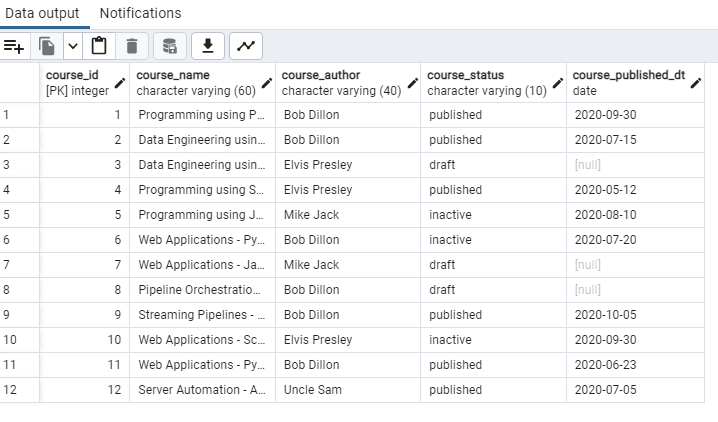

In [31]:
ruta_imagen = "C:\MariaP\Visualizacion Cientifica\PostgreSQL\Asignacion3.png"
print("Tablas de la base de datos")
Image(filename=ruta_imagen)

In [6]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

cursor.execute('''DELETE FROM courses
                      WHERE course_status NOT IN ('draft', 'published');''')

select_query = '''SELECT course_author, COUNT(*) AS total_cursos_publicados
                      FROM courses
                      WHERE course_status = 'published'
                      GROUP BY course_author
                      ORDER BY total_cursos_publicados DESC;'''
cursor.execute(select_query)
print("Recuento de cursos publicados por autor (ordenado por recuento descendente):")
rows = cursor.fetchall()
for row in rows:
    print(row)
    
connection.close()

Recuento de cursos publicados por autor (ordenado por recuento descendente):
('Bob Dillon', 4)
('Elvis Presley', 1)
('Uncle Sam', 1)


In [7]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

cursor.execute('''DROP TABLE IF EXISTS users''')
# Crear la tabla users
create_table_query = '''CREATE TABLE users(
        user_id SERIAL PRIMARY KEY,
        user_first_name VARCHAR(30),
        user_last_name VARCHAR(30),
        user_email_id VARCHAR(50),
        user_gender VARCHAR(1),
        user_unique_id VARCHAR(15),
        user_phone_no VARCHAR(20),
        user_dob DATE,
        created_ts TIMESTAMP
    )'''
cursor.execute(create_table_query)
connection.commit()
print("Tabla 'users' creada satisfactoriamente.")

# Insertar los valores en la tabla
insert_query = '''INSERT INTO users (
        user_first_name, user_last_name, user_email_id, user_gender, 
        user_unique_id, user_phone_no, user_dob, created_ts
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)'''
    
data = [
    ('Giuseppe', 'Bode', 'gbode0@imgur.com', 'M', '88833-8759', 
     '+86 (764) 443-1967', '1973-05-31', '2018-04-15 12:13:38'),
    ('Lexy', 'Gisbey', 'lgisbey1@mail.ru', 'F', '262501-029', 
     '+86 (751) 160-3742', '2003-05-31', '2020-12-29 06:44:09'),
    ('Karel', 'Claringbold', 'kclaringbold2@yale.edu', 'F', '391-33-2823', 
     '+62 (445) 471-2682', '1985-11-28', '2018-11-19 00:04:08'),
    ('Marv', 'Tanswill', 'mtanswill3@dedecms.com', 'F', '1195413-80', 
     '+62 (497) 736-6802', '1998-05-24', '2018-11-19 16:29:43'),
    ('Gertie', 'Espinoza', 'gespinoza4@nationalgeographic.com', 'M', '471-24-6869', 
     '+249 (687) 506-2960', '1997-10-30', '2020-01-25 21:31:10'),
    ('Saleem', 'Danneil', 'sdanneil5@guardian.co.uk', 'F', '192374-933', 
     '+63 (810) 321-0331', '1992-03-08', '2020-11-07 19:01:14'),
    ('Rickert', 'O''Shiels', 'roshiels6@wikispaces.com', 'M', '749-27-47-52', 
     '+86 (184) 759-3933', '1972-11-01', '2018-03-20 10:53:24'),
    ('Cybil', 'Lissimore', 'clissimore7@pinterest.com', 'M', '461-75-4198', 
     '+54 (613) 939-6976', '1978-03-03', '2019-12-09 14:08:30'),
    ('Melita', 'Rimington', 'mrimington8@mozilla.org', 'F', '892-36-676-2', 
     '+48 (322) 829-8638', '1995-12-15', '2018-04-03 04:21:33'),
    ('Benetta', 'Nana', 'bnana9@google.com', 'M', '197-54-1646', 
     '+420 (934) 611-0020', '1971-12-07', '2018-10-17 21:02:51'),
    ('Gregorius', 'Gullane', 'ggullanea@prnewswire.com', 'F', '232-55-52-58', 
     '+62 (780) 859-1578', '1973-09-18', '2020-01-14 23:38:53'),
    ('Una', 'Glayzer', 'uglayzerb@pinterest.com', 'M', '898-84-336-6', 
     '+380 (840) 437-3981', '1983-05-26', '2019-09-17 03:24:21'),
    ('Jamie', 'Vosper', 'jvosperc@umich.edu', 'M', '247-95-68-44', 
     '+81 (205) 723-1942', '1972-03-18', '2020-07-23 16:39:33'),
    ('Calley', 'Tilson', 'ctilsond@issuu.com', 'F', '415-48-894-3', 
     '+229 (698) 777-4904', '1987-06-12', '2020-06-05 12:10:50'),
    ('Peadar', 'Gregorowicz', 'pgregorowicze@omniture.com', 'M', '403-39-5-869', 
     '+7 (267) 853-3262', '1996-09-21', '2018-05-29 23:51:31'),
    ('Jeanie', 'Webling', 'jweblingf@booking.com', 'F', '399-83-05-03', 
     '+351 (684) 413-0550', '1994-12-27', '2018-02-09 01:31:11'),
    ('Yankee', 'Jelf', 'yjelfg@wufoo.com', 'F', '607-99-0411', 
     '+1 (864) 112-7432', '1988-11-13', '2019-09-16 16:09:12'),
    ('Blair', 'Aumerle', 'baumerleh@toplist.cz', 'F', '430-01-578-5', 
     '+7 (393) 232-1860', '1979-11-09', '2018-10-28 19:25:35'),
    ('Pavlov', 'Steljes', 'psteljesi@macromedia.com', 'F', '571-09-6181', 
     '+598 (877) 881-3236', '1991-06-24', '2020-09-18 05:34:31'),
    ('Darn', 'Hadeke', 'dhadekej@last.fm', 'M', '478-32-02-87', 
     '+370 (347) 110-4270', '1984-09-04', '2018-02-10 12:56:00'),
    ('Wendell', 'Spanton', 'wspantonk@de.vu', 'F', None, 
     '+84 (301) 762-1316', '1973-07-24', '2018-01-30 01:20:11'),
    ('Carlo', 'Yearby', 'cyearbyl@comcast.net', 'F', None, 
     '+55 (288) 623-4067', '1974-11-11', '2018-06-24 03:18:40'),
    ('Sheila', 'Evitts', 'sevittsm@webmd.com', None, '830-40-5287',
     None, '1977-03-01', '2020-07-20 09:59:41'),
    ('Sianna', 'Lowdham', 'slowdhamn@stanford.edu', None, '778-0845', 
     None, '1985-12-23', '2018-06-29 02:42:49'),
    ('Phylys', 'Aslie', 'paslieo@qq.com', 'M', '368-44-4478', 
     '+86 (765) 152-8654', '1984-03-22', '2019-10-01 01:34:28')
]

cursor.executemany(insert_query, data)
connection.commit()
print("Datos insertados satisfactoriamente en la tabla 'users'.")

connection.close()


Tabla 'users' creada satisfactoriamente.
Datos insertados satisfactoriamente en la tabla 'users'.


Tablas de la base de datos


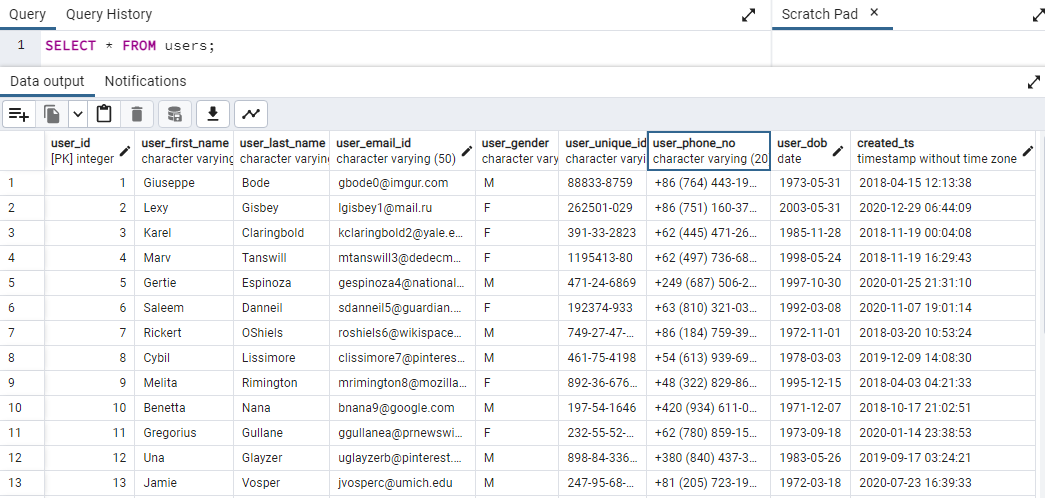

In [8]:
ruta_imagen = "C:\MariaP\Visualizacion Cientifica\PostgreSQL\Asignacion5.png"
print("Tablas de la base de datos")
Image(filename=ruta_imagen)

In [9]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

cursor.execute('''SELECT EXTRACT(YEAR FROM created_ts) AS created_year, COUNT(*) AS user_count
               FROM users
               GROUP BY created_year
               ORDER BY created_year ASC''')

results = cursor.fetchall()

# Mostrar los resultados
print("Número de usuarios creados por año:")
for row in results:
    print(f"Año: {row[0]}, Cantidad de usuarios: {row[1]}")
    
connection.close()

Número de usuarios creados por año:
Año: 2018, Cantidad de usuarios: 13
Año: 2019, Cantidad de usuarios: 4
Año: 2020, Cantidad de usuarios: 8


In [10]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

query = '''SELECT user_id, user_dob, user_email_id,
                      TO_CHAR(user_dob, 'FMDay') AS user_day_of_birth
               FROM users
               WHERE EXTRACT(MONTH FROM user_dob) = 5
               ORDER BY EXTRACT(DAY FROM user_dob)'''

cursor.execute(query)

# Obtener los resultados
results = cursor.fetchall()

# Mostrar los resultados
print("Usuarios nacidos en mayo:")
for row in results:
    print(f"ID de Usuario: {row[0]}, Fecha de Nacimiento: {row[1]}, Email: {row[2]}, Día de Nacimiento: {row[3]}")

connection.close()

Usuarios nacidos en mayo:
ID de Usuario: 4, Fecha de Nacimiento: 1998-05-24, Email: mtanswill3@dedecms.com, Día de Nacimiento: Sunday
ID de Usuario: 12, Fecha de Nacimiento: 1983-05-26, Email: uglayzerb@pinterest.com, Día de Nacimiento: Thursday
ID de Usuario: 1, Fecha de Nacimiento: 1973-05-31, Email: gbode0@imgur.com, Día de Nacimiento: Thursday
ID de Usuario: 2, Fecha de Nacimiento: 2003-05-31, Email: lgisbey1@mail.ru, Día de Nacimiento: Saturday


In [11]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

# Consulta SQL para obtener los nombres e IDs de correo electrónico de los usuarios añadidos en 2019
query = '''SELECT user_id,
                      UPPER(user_first_name || ' ' || user_last_name) AS user_name,
                      user_email_id,
                      created_ts,
                      EXTRACT(YEAR FROM created_ts) AS created_year
               FROM users
               WHERE EXTRACT(YEAR FROM created_ts) = 2019
               ORDER BY user_name ASC'''

# Ejecutar la consulta
cursor.execute(query)

# Obtener los resultados
results = cursor.fetchall()

# Mostrar los resultados
print("Usuarios añadidos en 2019:")
for row in results:
    print(f"ID de Usuario: {row[0]}, Nombre: {row[1]}, Email: {row[2]}, Fecha de Creación: {row[3]}, Año de Creación: {row[4]}")

connection.close()

Usuarios añadidos en 2019:
ID de Usuario: 8, Nombre: CYBIL LISSIMORE, Email: clissimore7@pinterest.com, Fecha de Creación: 2019-12-09 14:08:30, Año de Creación: 2019
ID de Usuario: 25, Nombre: PHYLYS ASLIE, Email: paslieo@qq.com, Fecha de Creación: 2019-10-01 01:34:28, Año de Creación: 2019
ID de Usuario: 12, Nombre: UNA GLAYZER, Email: uglayzerb@pinterest.com, Fecha de Creación: 2019-09-17 03:24:21, Año de Creación: 2019
ID de Usuario: 17, Nombre: YANKEE JELF, Email: yjelfg@wufoo.com, Fecha de Creación: 2019-09-16 16:09:12, Año de Creación: 2019


In [12]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

# Consulta SQL para obtener el número de usuarios por género
query = '''SELECT CASE
                        WHEN user_gender = 'M' THEN 'Male'
                        WHEN user_gender = 'F' THEN 'Female'
                        ELSE 'Not Specified' END AS gender,
                      COUNT(*) AS user_count
               FROM users
               GROUP BY user_gender
               ORDER BY user_count DESC'''

    # Ejecutar la consulta
cursor.execute(query)

    # Obtener los resultados
results = cursor.fetchall()

    # Mostrar los resultados
print("Número de usuarios por género:")
for row in results:
    print(f"Género: {row[0]}, Cantidad de usuarios: {row[1]}")

connection.close()

Número de usuarios por género:
Género: Female, Cantidad de usuarios: 13
Género: Male, Cantidad de usuarios: 10
Género: Not Specified, Cantidad de usuarios: 2


In [13]:
from tabulate import tabulate 

In [14]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

# Consulta SQL para obtener los últimos 4 dígitos de los IDs únicos
query = '''SELECT user_id,
                      COALESCE(user_unique_id, 'Not Specified') AS user_unique_id,
                      CASE
                          WHEN user_unique_id IS NULL THEN 'Not Specified'
                          WHEN LENGTH(REPLACE(user_unique_id, '-', '')) < 9 THEN 'Invalid Unique Id'
                          ELSE RIGHT(REPLACE(user_unique_id, '-', ''), 4)
                      END AS user_unique_id_last4
               FROM users
               ORDER BY user_id'''

cursor.execute(query)

# Obtener los resultados
results = cursor.fetchall()

# Mostrar los resultados en forma de tabla
headers = ["ID de Usuario", "ID Único", "Últimos 4 dígitos"]
print(tabulate(results, headers=headers, tablefmt="grid"))

connection.close()

+-----------------+---------------+---------------------+
|   ID de Usuario | ID Único      | Últimos 4 dígitos   |
+=================+===============+=====================+
|               1 | 88833-8759    | 8759                |
+-----------------+---------------+---------------------+
|               2 | 262501-029    | 1029                |
+-----------------+---------------+---------------------+
|               3 | 391-33-2823   | 2823                |
+-----------------+---------------+---------------------+
|               4 | 1195413-80    | 1380                |
+-----------------+---------------+---------------------+
|               5 | 471-24-6869   | 6869                |
+-----------------+---------------+---------------------+
|               6 | 192374-933    | 4933                |
+-----------------+---------------+---------------------+
|               7 | 749-27-47-52  | 4752                |
+-----------------+---------------+---------------------+
|             

In [15]:
connection = psycopg2.connect(user="mariap_user",
                                  password="password",
                                  host="localhost",
                                  port="5432",
                                  database="mariap_db")
cursor = connection.cursor()

# Consulta SQL para obtener el recuento de usuarios por código de país
query = '''SELECT SUBSTRING(user_phone_no, 2, POSITION(' ' IN user_phone_no) - 2) AS country_code,
                      COUNT(*) AS user_count
               FROM users
               WHERE user_phone_no IS NOT NULL
               GROUP BY 1
               ORDER BY CAST(SUBSTRING(user_phone_no, 2, POSITION(' ' IN user_phone_no) - 2) AS INTEGER)'''

cursor.execute(query)

# Obtener los resultados
results = cursor.fetchall()

print("Recuento de usuarios por código de país:")
for row in results:
    print(f"Código de país: {row[0]}, Cantidad de usuarios: {row[1]}")

connection.close()

Recuento de usuarios por código de país:
Código de país: 1, Cantidad de usuarios: 1
Código de país: 7, Cantidad de usuarios: 2
Código de país: 48, Cantidad de usuarios: 1
Código de país: 54, Cantidad de usuarios: 1
Código de país: 55, Cantidad de usuarios: 1
Código de país: 62, Cantidad de usuarios: 3
Código de país: 63, Cantidad de usuarios: 1
Código de país: 81, Cantidad de usuarios: 1
Código de país: 84, Cantidad de usuarios: 1
Código de país: 86, Cantidad de usuarios: 4
Código de país: 229, Cantidad de usuarios: 1
Código de país: 249, Cantidad de usuarios: 1
Código de país: 351, Cantidad de usuarios: 1
Código de país: 370, Cantidad de usuarios: 1
Código de país: 380, Cantidad de usuarios: 1
Código de país: 420, Cantidad de usuarios: 1
Código de país: 598, Cantidad de usuarios: 1


### Importar archivo Cardano con SQLite

In [16]:
from sqlalchemy import create_engine
import pandas as pd

In [17]:
import sqlite3
import os
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Conexión establecida a la base de datos:", os.path.abspath(db_file))
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"sqlitecardano.db")

Conexión establecida a la base de datos: c:\MariaP\Visualizacion Cientifica\PostgreSQL\sqlitecardano.db
2.6.0


In [18]:
df = pd.read_csv("https://raw.githubusercontent.com/lihkir/Uninorte/main/AppliedStatisticMS/DataVisualizationRPython/Lectures/Python/PythonDataSets/ADA-USD.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [19]:
names_list = df.columns.tolist()

In [20]:
engine = create_engine('sqlite:///sqlitecardano.db')
df.to_sql('cardano', engine, if_exists = 'replace', index=False, method='multi')

1475

In [21]:
connection = sqlite3.connect('sqlitecardano.db')

cursor = connection.cursor()
cursor.execute("SELECT * FROM cardano;")
close = cursor.fetchall()
car_sql = pd.DataFrame(close)
display(car_sql.head())

car_names = []
cnames_list = cursor.execute('''SELECT * FROM cardano''') 
for column in cnames_list.description: 
    car_names.append(column[0])
    
display(car_names)
print("\nOperation done successfully")
connection.close()

,0,1,2,3,4,5,6
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


Operation done successfully


In [22]:
car_sql.columns = names_list 
car_sql = car_sql.sort_values(by = "Date")
car_sql.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-01,0.021678,0.032226,0.017354,0.024969,0.024969,50068700.0
1,2017-10-02,0.024607,0.030088,0.019969,0.025932,0.025932,57641300.0
2,2017-10-03,0.025757,0.027425,0.020690,0.020816,0.020816,16997800.0
3,2017-10-04,0.020864,0.022806,0.020864,0.021931,0.021931,9000050.0
4,2017-10-05,0.021951,0.022154,0.020859,0.021489,0.021489,5562510.0


In [23]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = car_sql['Date'],
                                     open = car_sql['Open'], 
                                     high = car_sql['High'],
                                     low = car_sql['Low'], 
                                     close = car_sql['Close'])
                     ])
fig.update_layout(
    title="Cardano USD (ETH-USD)",
    xaxis_title="Day",
    yaxis_title="CAR-USD",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

#### EDA

In [24]:
print("Resumen estadístico del DataFrame:")
print(df.describe())

Resumen estadístico del DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1471.000000  1471.000000  1471.000000  1471.000000  1471.000000   
mean      0.374234     0.393359     0.354385     0.375726     0.375726   
std       0.609602     0.639195     0.578952     0.611501     0.611501   
min       0.018414     0.021050     0.017354     0.018539     0.018539   
25%       0.047560     0.049503     0.046073     0.047592     0.047592   
50%       0.093398     0.096776     0.090105     0.093434     0.093434   
75%       0.301339     0.318211     0.283567     0.301889     0.301889   
max       2.966390     3.099186     2.907606     2.968239     2.968239   

             Volume  
count  1.471000e+03  
mean   1.090947e+09  
std    2.258370e+09  
min    1.739460e+06  
25%    5.366896e+07  
50%    1.359691e+08  
75%    6.999972e+08  
max    1.914198e+10  


In [25]:
print("La primera fecha es", min(df.Date))
print("La primera fecha es", max(df.Date))

La primera fecha es 2017-10-01
La primera fecha es 2021-10-14


In [26]:
print("\nManejo de valores nulos:")
print(df.isnull().sum())


Manejo de valores nulos:
Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


Se cuenta con información de 1741 días del valor de Cardano desde el 01-oct-2017 hasta el 14-oct-2021.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

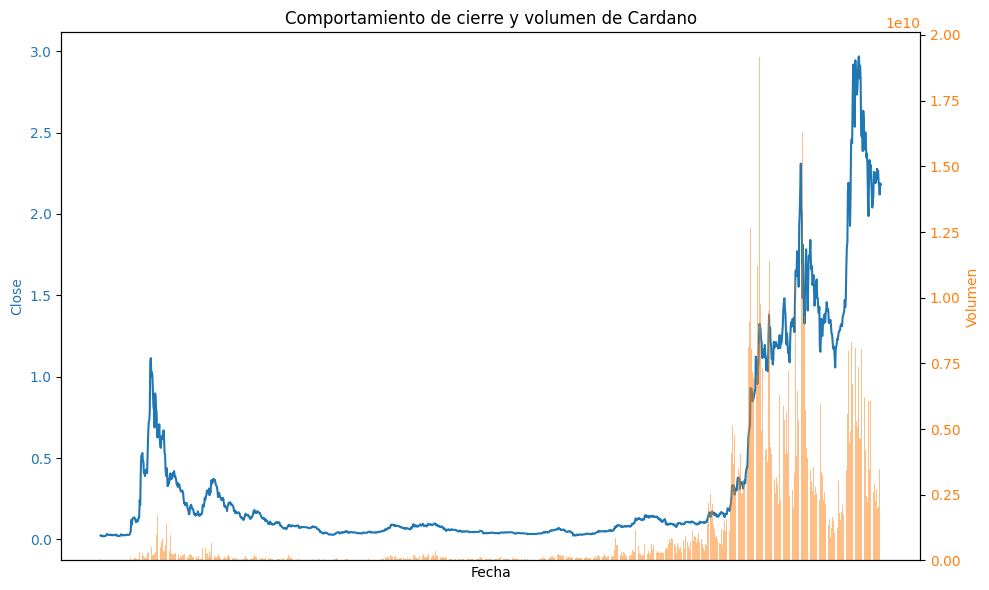

In [28]:
import matplotlib.pyplot as plt

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de línea de cierre de Cardano
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Close', color=color)
ax1.plot(df['Date'], df['Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Crear un segundo eje y para el gráfico de barras de volumen
ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Volumen', color=color)  
ax2.bar(df['Date'], df['Volume'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

# Título
plt.title('Comportamiento de cierre y volumen de Cardano')

# Ajustar el diseño
fig.tight_layout()  
plt.show()


La criptomoneda tenía un comportamiento estable y bajo hasta que se presentó un crecimiento significativo empezando en febrero del 2021  con un valor máximo el 2 de septiembre de 2021. 
Duatnte la primera etapa de crecimiento se presentan los volúmenes más altos.

C:\Users\Analista BI\AppData\Local\Temp\ipykernel_20388\4113031317.py:1: FutureWarning:

The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



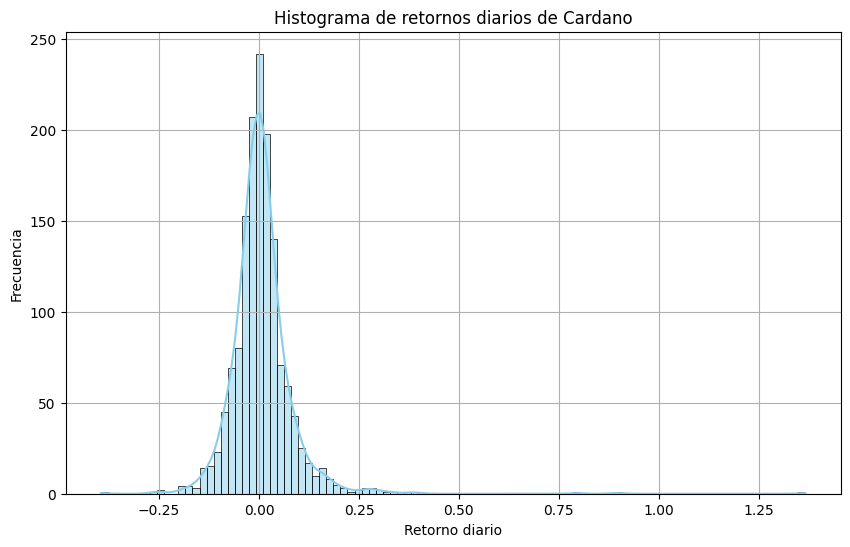

In [29]:
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily Return'].dropna(), bins=100, color='skyblue', kde=True)
plt.title('Histograma de retornos diarios de Cardano')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

El retorno diario es la variación porcentual del precio de cierre de un día respecto al precio de cierre del día anterior. Este histograma sugiere que los retornos diarios de Cardano tienden a ser relativamente estables, con una concentración alrededor de cero (mayor frecuencia observada). 

Sin embargo vamos a revisar el comportamiento a partir de febrero 2021 que se presentó un incremento.

C:\Users\Analista BI\AppData\Local\Temp\ipykernel_20388\435242161.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



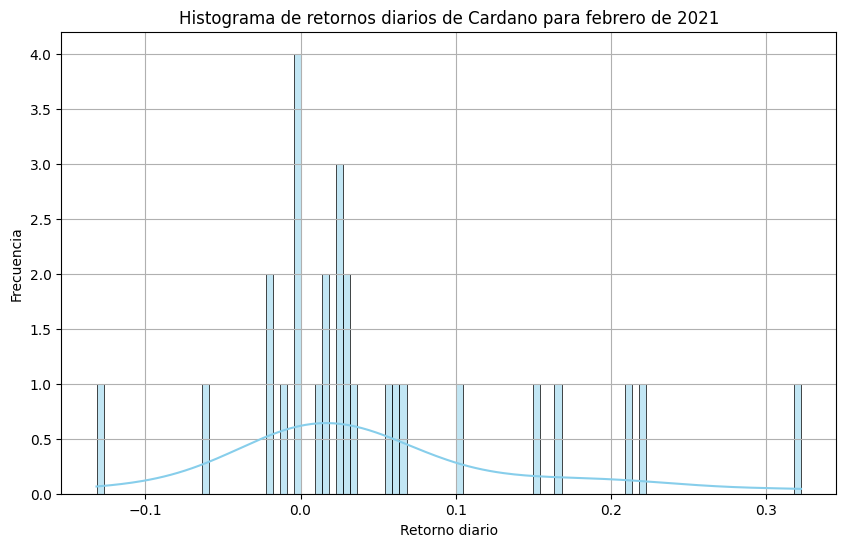

In [33]:
df['Date'] = pd.to_datetime(df['Date'])
df_febrero_2021 = df[(df['Date'].dt.year == 2021) & (df['Date'].dt.month == 2)]
df_febrero_2021['Daily Return'] = df_febrero_2021['Close'].pct_change()
plt.figure(figsize=(10, 6))
sns.histplot(df_febrero_2021['Daily Return'].dropna(), bins=100, color='skyblue', kde=True)
plt.title('Histograma de retornos diarios de Cardano para febrero de 2021')
plt.xlabel('Retorno diario')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se observa una mayor variabilidad en el retorno diario, el cual va desde -0.2 hasta 0.3.